<a href="https://colab.research.google.com/github/Junseokee/Study-Python/blob/main/220728_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### 코랩파일 공유하는 법 드라이브에서 공유 -> 엑세스 권한 풀기 -> 링크 복사 -> 링크 공유

### 데이터 전처리

### 데이터 품질 문제
  - 데이터 분포의 지나친 차이
    - 최대값과 최소값 차이가 피쳐보다 많이 나는 경우
    - 스케일의 차이가 많이나는 경우 학습에 영향을 줄 수 있기 때문에 스케일을 맞춰주는 작업 필요
    - 데이터 범위를 0~1로 만들거나 표준 정규분포 형태로 변경한다,

  - 기수형 데이터와 서수형 데이터
    -기수형 서수형은 일반적으로 숫자로 표현하지 않아 컴퓨터가 이해할 수 없음
    - 명목형 값은 기수형(순서가 있는 데이터), 서수형(순서가 없는 데이터)
    - 이러한 특징에 따라 숫자형태로 바꿀 것인지 고려
  
  -결측치
    - 결측치는 데이터에서 실제로 존재하지만, DB에 기록되지않음
    - 데이터에 따라 결측치 처리 전략을 잘 세워야한다.

  - 이상치
    - 피쳐에서 극단적으로 큰 값이나 작은 값 들이있다.
    - 이는 데이터 오기입이나, 일반적이지 않은 상황에 대한 데이터이다.


### 데이터 전처리 전략

  - 결측치 처리하기 : 드롭과 채우기
    - 데이터를 처리하려고 할때 없는 경우는 흔함
    - 이 경우 어떻게 할지 전략 세워야함
      - 결측치가 있는 행이나 열 삭제
      - 평균, 최대, 최소, 최빈, 중간값 등으로 데이터 채우기 ex) 날씨 전후 날씨
      


In [17]:
import pandas as pd
import numpy as np

raw_data = {'first_name' : ['jason', np.nan, 'tina', 'jake', 'amy'],
            'last_name' : ['Miller',np.nan,'Ali','Milner','Cooze'],
            'age': [42,np.nan,36,24,73],
            'sex' : ['m',np.nan, 'f', 'm', 'f'],
            'preTestScore' : [4,np.nan, np.nan, 2, 3],
            'postTestScore': [25,np.nan,np.nan,62,70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name','age',
                                       'sex','preTestScore','postTestScore'])

df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,tina,Ali,36.0,f,NaN,NaN
3,jake,Milner,24.0,m,2.0,62.0
4,amy,Cooze,73.0,f,3.0,70.0


In [18]:
df.isnull().sum() # .isnull() <- 결측치가 있으면 True 출력 .sum을 더하면 칼럼별 갯수를 알 수 있다.

first_name       1
last_name        1
age              1
sex              1
preTestScore     2
postTestScore    2
dtype: int64

In [19]:
df.isnull().sum() / len(df) # 결측치 비율 알아보는 방법

first_name       0.2
last_name        0.2
age              0.2
sex              0.2
preTestScore     0.4
postTestScore    0.4
dtype: float64

#### 1.1 드롭
  - 결측치가 나온 데이터의 열이나 행 삭제
  - dropna 함수 사용
  

In [20]:
df.dropna() # na를 날림 그래도 여전히 있다 (inplace = True 사용 or 변수에 할당해야함)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,jason,Miller,42.0,m,4.0,25.0
3,jake,Milner,24.0,m,2.0,62.0
4,amy,Cooze,73.0,f,3.0,70.0


In [21]:
df_no_missing = df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,jason,Miller,42.0,m,4.0,25.0
3,jake,Milner,24.0,m,2.0,62.0
4,amy,Cooze,73.0,f,3.0,70.0


In [22]:
df_cleaned = df.dropna(how='all') # how = 'all'모든 데이터가 NaN인 행만 삭제
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,jason,Miller,42.0,m,4.0,25.0
2,tina,Ali,36.0,f,NaN,NaN
3,jake,Milner,24.0,m,2.0,62.0
4,amy,Cooze,73.0,f,3.0,70.0


In [28]:
df_cleaned2 = df.dropna(how='any') # how = any 행에 하나라도 NaN일 경우 행 삭제
df_cleaned2

,first_name,last_name,age,sex,preTestScore,postTestScore
0,jason,Miller,42.0,m,4.0,25.0
3,jake,Milner,24.0,m,2.0,62.0
4,amy,Cooze,73.0,f,3.0,70.0


In [29]:
df['location'] = np.nan
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tina,Ali,36.0,f,NaN,NaN,NaN
3,jake,Milner,24.0,m,2.0,62.0,NaN
4,amy,Cooze,73.0,f,3.0,70.0,NaN


In [30]:
df.dropna(axis=1, how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,tina,Ali,36.0,f,NaN,NaN
3,jake,Milner,24.0,m,2.0,62.0
4,amy,Cooze,73.0,f,3.0,70.0


In [24]:
df.dropna(axis=0, thresh=1) #thresh=1 데이터가 1개라도 존재하는 행은 그대로 남겨둔다

,first_name,last_name,age,sex,preTestScore,postTestScore
0,jason,Miller,42.0,m,4.0,25.0
2,tina,Ali,36.0,f,NaN,NaN
3,jake,Milner,24.0,m,2.0,62.0
4,amy,Cooze,73.0,f,3.0,70.0


In [25]:
df.dropna(thresh=5)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,jason,Miller,42.0,m,4.0,25.0
3,jake,Milner,24.0,m,2.0,62.0
4,amy,Cooze,73.0,f,3.0,70.0


In [26]:
df.fillna(0) # nan값을 다른값으로 대체

,first_name,last_name,age,sex,preTestScore,postTestScore
0,jason,Miller,42.0,m,4.0,25.0
1,0,0,0.0,0,0.0,0.0
2,tina,Ali,36.0,f,0.0,0.0
3,jake,Milner,24.0,m,2.0,62.0
4,amy,Cooze,73.0,f,3.0,70.0


In [32]:
df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True) #nan값에 평균값을 삽입
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,tina,Ali,36.0,f,3.0,NaN,NaN
3,jake,Milner,24.0,m,2.0,62.0,NaN
4,amy,Cooze,73.0,f,3.0,70.0,NaN


In [34]:
df.groupby("sex")[
                  "postTestScore"].transform("mean")

0    43.5
1     NaN
2    70.0
3    43.5
4    70.0
Name: postTestScore, dtype: float64

In [36]:
df['postTestScore'].fillna( #fillna(method = bfill<- 바로 아랫값, ffill바로 윗값)
  df.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,tina,Ali,36.0,f,3.0,70.0,NaN
3,jake,Milner,24.0,m,2.0,62.0,NaN
4,amy,Cooze,73.0,f,3.0,70.0,NaN


### 범주형 데이터 처리하기 : 원핫인코딩
  - 범주형 데이터 처리하는 대표적인 방법
  - 범주형 데이터의 개수만큼 가변수를 생성하여 존재 유무를 1또는 0으로 표현
  - 범주가 두개인 이산형 데이터는 하는 의마가 없다

  ex) {R, G, B} -> {R} =[1,0,0], {G} =[0,1,0], {B} =[0,0,1]

  - 사이킷런에서 제공하는 LabelEncoder나 OneHotRnocoder를 이용
  - 판다스에서 get_dummies 함수 사용 (더미변수라고 함)


In [37]:
edges = pd.DataFrame({'source': [0,1,2],
                      'target': [2,2,3],
                      'weight': [3,4,5],
                      'color' : ['red', 'blue','blue']})
edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [38]:
edges.dtypes

source     int64
target     int64
weight     int64
color     object
dtype: object

In [40]:
pd.get_dummies(edges) # 이산형 데이터 타입바꾸기 귀찮을때 더미변수로 만든다음 한칼럼을 지우는 방법도 있음

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [41]:
pd.get_dummies(edges['color'])

,blue,red
0,0,1
1,1,0
2,1,0


In [42]:
pd.get_dummies(edges[["color"]])

,color_blue,color_red
0,0,1
1,1,0
2,1,0


In [43]:
edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [45]:
weight_dict = {3:"M", 4:"L", 5:"XL"}
edges['weight_sign'] = edges['weight'].map(weight_dict) # map 함수를 이용해서 각각 대응되는 값으로 변경한 새칼럼 생성
edges

,source,target,weight,color,weight_sign
0,0,2,3,red,M
1,1,2,4,blue,L
2,2,3,5,blue,XL


In [46]:
weight_sign = pd.get_dummies(edges['weight_sign']) #문자값 사이즈가 작성된 칼럼을 원핫인코딩 진행
weight_sign

,L,M,XL
0,0,1,0
1,1,0,0
2,0,0,1


In [47]:
pd.concat([edges, weight_sign], axis =1 ) #concat함수를 이용해 데이터프레임 수평결합

,source,target,weight,color,weight_sign,L,M,XL
0,0,2,3,red,M,0,1,0
1,1,2,4,blue,L,1,0,0
2,2,3,5,blue,XL,0,0,1


### 범주형 데이터로 변환하여 처리하기 : 바인딩

  - 연속형 데이터를 범주형 변환하여 처리할때가 있다.
  - 연속형 변수 자체에 의미가 있을 수 있기 때문에 바인딩 기법을 통해 범주형 데이터로 변화하여 할 때 좀 더 나은 성능

In [54]:
raw_data = {'regiment': ['Nighthawks','Nighthawks', 
                         'Nighthawks','Nighthawks',
                         'Dragons','Dragons',
                         'Dragons','Dragons',
                         'Scouts','Scouts',
                         'Scouts','Scouts'],
            'company' : ['1st','1st','2nd','2nd',
                         '1st','1st','2nd','2nd',
                         '1st','1st','2nd','2nd'],
            'name' : [1,2,3,4,5,6,7,8,9,10,11,12],
            'preTestScore' : [4,24,31,2,3,4,
                             24,31,2,3,2,3],
            'postTestScore' : [25,94,57,62,70,
                               25,94,57,62,70,62,70]}

df = pd.DataFrame(raw_data, columns = ['regiment', 'company','name', #데이터 프레임 생성
                                       'preTestScore','postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,1,4,25
1,Nighthawks,1st,2,24,94
2,Nighthawks,2nd,3,31,57
3,Nighthawks,2nd,4,2,62
4,Dragons,1st,5,3,70
5,Dragons,1st,6,4,25
6,Dragons,2nd,7,24,94
7,Dragons,2nd,8,31,57
8,Scouts,1st,9,2,62
9,Scouts,1st,10,3,70


In [55]:
bins = [0,25,50,75,100] #bins 정의
group_names = ["Low",'Okay','Good','Great']
categories = pd.cut(
    df['postTestScore'], bins, labels=group_names)

categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): ['Low' < 'Okay' < 'Good' < 'Great']

### 데이터 크기 맞추기 : 피쳐 스케일링
  - 스케일링은 데이터 크기를 맞추는 기법
  - 모델을 만들 때 데이터 간의 범위가 차이가 나는데 이를 하나의 모델에 넣게 되면 데이터의 범위가 훨씬 넓어져 키가 몸무게에 과다하게 영향을 줄 수 있다.
  - 변수 범위가 다를때 하나의 변수로 범위로 통일시켜 처리한다.

  - 스케일링 전략
    - max-min normalization
      zi = (xi-min(x)) / max(x)-min(x) * (newmax - newmin) -newmax

    - z-score normalization(표준정규분포)
      (xi - 평균) / 표준편차


    


In [56]:
df = pd.DataFrame(
    { 'A' : [14.00,90.20,90.95,96.27,91.21],
     'B' : [103.02, 107.26, 110.35, 114.23, 114.68],
     'C' : ["big", 'small','big','small','small']})

df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [57]:
df["A"] - df["A"].min() # A열을 전부 그 열의 최소값으로 빼줌

0     0.00
1    76.20
2    76.95
3    82.27
4    77.21
Name: A, dtype: float64

In [59]:
(df["A"] - df["A"].min()) / (df["A"].max() - df["A"].min()) #max-min normalization

0    0.000000
1    0.926219
2    0.935335
3    1.000000
4    0.938495
Name: A, dtype: float64

In [60]:
(df["B"] - df["B"].mean()) / (df["B"].std())

0   -1.405250
1   -0.540230
2    0.090174
3    0.881749
4    0.973556
Name: B, dtype: float64

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


In [2]:
#os.environ을 이용하여 Kaggle API 세팅
os.environ['KAGGLE_USERNAME'] = 'junseokee'
os.environ['KAGGLE_KEY'] = '700d85d8d7f11484367ea21d45aa2bee'

In [3]:
# Linux 명령어로 kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle~)
# Linux 명령어로 압축 해제하기
!kaggle competitions download -c titanic #파일 다운로드
!mkdir 'ch06' #dir 생성
!unzip '*.zip' -d/content/ch06 #압축풀기 "-d/content/ch06" 여기에다

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 20.7MB/s]
Archive:  titanic.zip
  inflating: /content/ch06/gender_submission.csv  
  inflating: /content/ch06/test.csv  
  inflating: /content/ch06/train.csv  


In [4]:
!rm '/content/ch06/gender_submission.csv'

In [6]:
DATA_DIR = '/content/ch06/'
# 파일이 두개일땐 그냥 두개 read해서 concat하는게 더 수월함
data_files = sorted([os.path.join(DATA_DIR, filename)  # os.path.join <-  경로합치는 함수 ; 파일 이름별로 정렬
                    for filename in os.listdir(DATA_DIR)], reverse=True) #디렉토리에 있는 파일을 리스트로 읽어오는것 reverse 정렬후 뒤집

data_files

['/content/ch06/train.csv', '/content/ch06/test.csv']

In [54]:
# 데이터 프레임을 각 파일에서 읽어온 후 df_list에 추가
df_list = []
for filename in data_files: #데이터 파일을 하나씩 리스트 읽어옴
  df_list.append(pd.read_csv(filename))

# 두개의 데이터 프레임을 하나로 통합
df = pd.concat(df_list, sort=False) #리스트의 파일 합치기 , sort는 디폴트가 False기 때문에 안해도됨

# 인덱스 초기화
df = df.reset_index(drop=True) # 인덱스 초기화해서 번호 재정의 drop = True <- 원래있던 인덱스값 삭제

#결과 출력
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.00,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1.00,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1.00,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0.00,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [55]:
# train.csv 데이터의 수
number_of_train_dataset = df['Survived'].notnull().sum() # 생존여부 값이 있는건 train set으로 분류
# train 데이터에 Servived는 존재
print(f'학습데이터의 수: {number_of_train_dataset}')

# test.csv 데이터의 수
number_of_train_dataset = df['Survived'].isnull().sum() # 생존여부가 null 값이면 test set으로 분류 (정답이 없으니까)
# test 데이터에 Servived는 비존재
print(f'학습데이터의 수: {number_of_train_dataset}')

학습데이터의 수: 891
학습데이터의 수: 418


In [57]:
y_true = df.pop('Survived')[:number_of_train_dataset] # Survived 파일만 뽑는것

KeyError: ignored

In [19]:
df.head(2).T

,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833
Cabin,NaN,C85


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [21]:
# 결측치 확인하기
# 데이터를 소수점 두 번째 자리까지 출력
pd.options.display.float_format = '{:.2f}'.format
# 결측치 값의 합을 데이터의 갯수로 나눠 비율로 출력 * 비율 굳이 안봐도됨
df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           20.09
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [23]:
df[df["Age"].notnull()].groupby(["Sex"])['Age'].mean()

Sex
female   28.69
male     30.59
Name: Age, dtype: float64

In [24]:
df[df["Age"].notnull()].groupby(["Pclass"])['Age'].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [25]:
df['Age'].fillna(df.groupby("Pclass")['Age'].transform('mean'), #연령 널값에 좌석별 연령의 평균값 각각 입력
                 inplace = True)

df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [29]:
df['Embarked'].value_counts() # value count() 함수 <- 밸류당 값이 몇갠지

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [27]:
df['Embarked'].value_counts(dropna=True).idxmax() 

'S'

In [30]:
df['Embarked'].fillna(df['Embarked'].value_counts(dropna=True).idxmax(), # 널값에 가장 빈도가 많은 S값 대입
                      inplace = True) 

In [31]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [33]:
#원핫 인코딩 진행
object_columns = ["PassengerId","Pclass","Name","Sex",
                  "Ticket","Cabin","Embarked"]
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]

for col_name in object_columns:
  df[col_name] = df[col_name].astype(object)
  
for col_name in numeric_columns:
  df[col_name] = df[col_name].astype(float)

df['Parch'] = df['Parch'].astype(int)
df['SibSp'] = df['SibSp'].astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   object 
 1   Pclass       1309 non-null   object 
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 112.6+ KB


In [43]:
#원본 데이터와 변형된 데이터를 병합하는 함수
def merge_and_get(ldf, rdf, on, how='inner', index=None): #병합 함수 ldf(leftDataFrame), 내부조인으로 index 없으면 None값
  if index is True: #index 값이 있으면 조인?
    return pd.merge(ldf, rdf, how=how, left_index = True, 
                    right_index=True)
  else:
    return pd.merge(ldf,rdf, how=how,on = on) #on은 기준 칼럼

In [46]:
one_hot_df = merge_and_get(
  df, pd.get_dummies(
    df['Sex'],prefix="Sex"), on = None, index=True) #prefix = 앞에 Sex_male, Sex_female 이렇게 나옴 인덱스를 기준으로 기존 df와 one_hot_df를 합침
one_hot_df = merge_and_get(
  one_hot_df, pd.get_dummies(
    df['Pclass'], prefix="Pclass"), on = None, index=True)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(
    df['Embarked'], prefix="Embarked"), on =None, index = True)

In [48]:
one_hot_df.head(3).T

,0,1,2
PassengerId,1,2,3
Pclass,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina"
Sex,male,female,female
Age,22.00,38.00,26.00
SibSp,1,1,0
Parch,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282
Fare,7.25,71.28,7.92
Cabin,NaN,C85,NaN


In [49]:
one_hot_df.columns #columns check

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

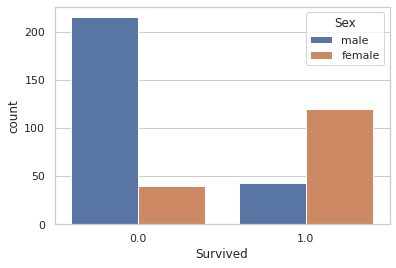

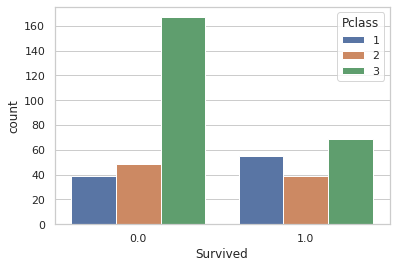

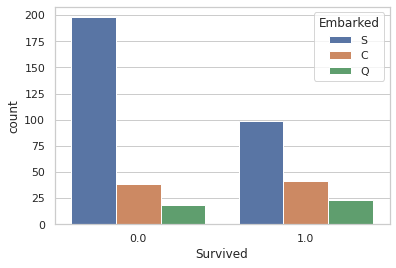

In [58]:
temp_columns = ['Sex',"Pclass",'Embarked']

for col_name in temp_columns:
  temp_df = pd.merge(
      one_hot_df[col_name], y_true, left_index=True, right_index=True) 
  sns.countplot(x='Survived', hue=col_name, data=temp_df) #생존여부를 알수있음
  plt.show()

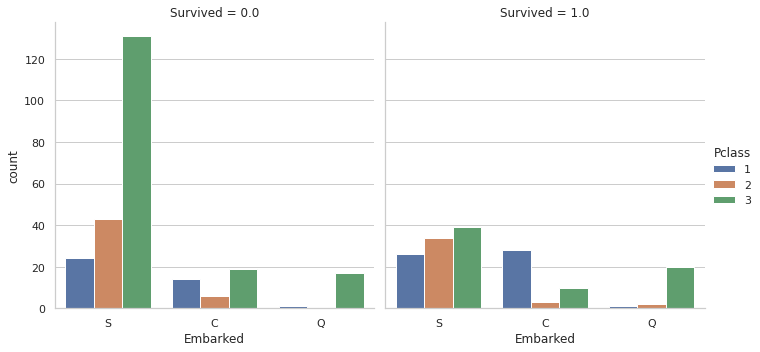

In [61]:
temp_df = pd.merge(one_hot_df[temp_columns],
                   y_true, left_index=True,
                   right_index=True)
g = sns.catplot(x="Embarked",
                hue = 'Pclass',
                col = 'Survived',
                data = temp_df,
                kind = 'count')

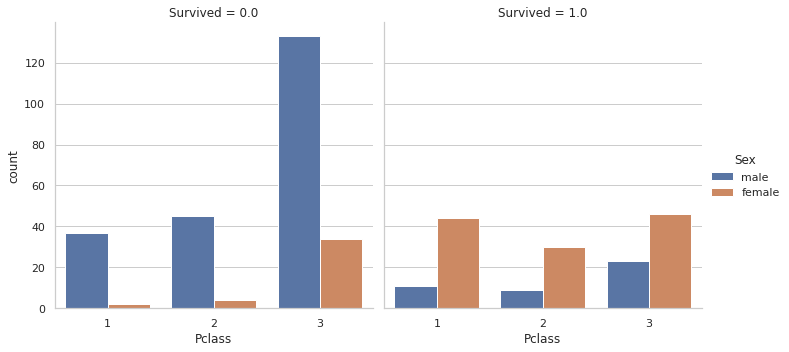

In [62]:
temp_df = pd.merge(
    one_hot_df[temp_columns],
                   y_true, left_index=True,
                   right_index=True)
g = sns.catplot(x="Pclass",
                hue = 'Sex',
                col = 'Survived',
                data = temp_df,
                kind = 'count')

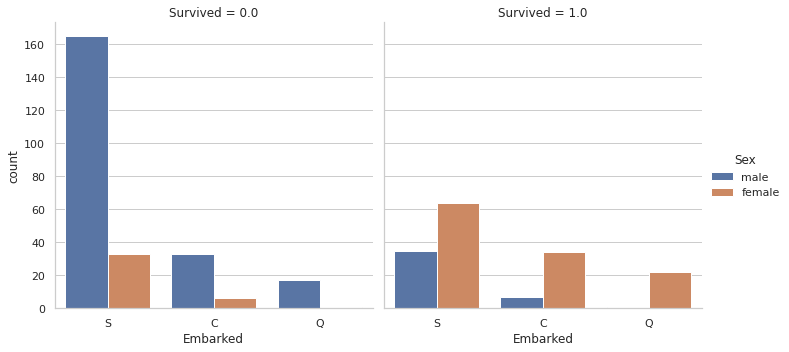

In [63]:
temp_df = pd.merge(
    one_hot_df[temp_columns],
                   y_true, left_index=True,
                   right_index=True)
g = sns.catplot(x="Embarked",
                hue = 'Sex',
                col = 'Survived',
                data = temp_df,
                kind = 'count')

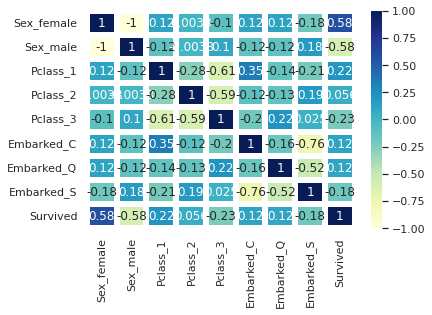

In [64]:
#상관관계

crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
if col_name.split("_")[0] in temp_columns and "_" in col_name] + ['Sex']


#temp 열 성별 하나는 똑같기때문에 쥐워야함
temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true,
                   left_index=True, right_index=True)

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True, linewidths=5, cmap="YlGnBu")